# Wrangle and Analyze Twitter Data

This is a four step project that aims at wrangling and analyzing data from the WeRateDogs twitter account. Data wrangling consists of gathering data, assessing it and clean it.

## Table of contents:

<ul>
<h3><a href="#gather">I. Gathering</a></h3>
<ol>
<li><a href="#archive">Reading WeRateDogs Archive</a></li>
<li><a href="#image">Reading Image predictions table</a></li>
<li><a href="#api">Gathering via Twitter API</a></li>
</ol>
<h3><a href="#assess">II. Assessing</a></h3>
<ol>
<li><a href="#vis">Visually</a></li>
<li><a href="#program">Programmatically</a></li>
<li><a href="#summary">Summary of data issues</a></li>
</ol>
<h3><a href="#clean">III. Cleaning</a></h3>
<ol>    
<li><a href="#copy">Copying datasets</a></li>
<li><a href="#tidy">Cleaning for tidiness</a></li>
<li><a href="#quality">Cleaning for quality</a></li>
</ol>
<h3><a href="#store">IV. Storing</a></h3>
<h3><a href="#analyze">V. Analyzing</a></h3>
</ul>
   

### Importing packages:

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import  matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## I. Gathering:

<a id='archive'></a>
### 1.Reading WeRateDogs Archive

In [118]:
df_archive = pd.read_csv(r'E:\NAND\project_4\twitter-archive-enhanced.csv',  sep=',')

In [3]:
#displaying df_archivecolumns :
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [4]:
df_archive.shape

(2356, 17)

<a id='image'></a>
### 2.Reading the image predictions file:

In [5]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
im = pd.read_csv(r'image-predictions.tsv', sep='\t')

In [7]:
#Displaying the first rows:
set(im)

{'img_num',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'tweet_id'}

<a id='api'></a>
### 3. Gathering via Twitter API

In [8]:
"""
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
"""

"\nconsumer_key = 'kvSYIYem4I0faYl0dMR21BRZz'\nconsumer_secret = 'm4UDt0fNk8a1ocK9L8WrytczOYIkBSfd1g009LMwvMxTGdkHMw'\naccess_token = '747396421-qZopZoNA27jpnnssZI4Lgnku5wvJ0oQP0KhducVz'\naccess_secret = 'cqT6Gbh7tjqSISNrXHFo0eDXmrxOuRB2k3hmsSNZ1ndv8'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\napi = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n"

In [9]:
"""
start= time.time()
error_list = []
with open('tweet_json.txt', 'w', encoding='utf-8') as file:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # Write the json data to the requied file with each tweet's data on its own line:
            json.dump(tweet, file)
            file.write('\n')
        except tweepy.TweepError:
            error_list.append(tweet_id)
end = time.time()
print(end - start)
"""

"\nstart= time.time()\nerror_list = []\nwith open('tweet_json.txt', 'w', encoding='utf-8') as file:\n    for tweet_id in df_archive['tweet_id']:\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode='extended')\n            # Write the json data to the requied file with each tweet's data on its own line:\n            json.dump(tweet, file)\n            file.write('\n')\n        except tweepy.TweepError:\n            error_list.append(tweet_id)\nend = time.time()\nprint(end - start)\n"

***Reading JSON data and export columns of interest to a csv file***

In [10]:
%%script false

tweet_df = []
with open(r'E:\NAND\project_4\tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        # Append to list of dictionaries
        tweet_df.append({'tweet_id': data['id_str'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'display_text_range': data['display_text_range']
                       })
df1 = pd.DataFrame(tweet_df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df1.to_csv('twitter__counts.csv' , encoding='utf-8', index=False)

%%script false

Couldn't find program: 'false'


In [11]:
df_cont = pd.read_csv(r'E:\NAND\project_4\twitter__counts.csv')
df_cont.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7783,36543
1,892177421306343426,5764,31480
2,891815181378084864,3816,23728
3,891689557279858688,7954,39869
4,891327558926688256,8584,38077


## II. Assessing:<a id='assess'></a>

In this section, I am going to assess, both visually and programatically, content and structural issues for each dataset.

### 1. Visually:<a id='vis'></a>

 ### *WeRateDogs Twitter archive:* ###

In [12]:
#displaying the first rows:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- 'timestamp' column includes both the date and the time, which violates the rule of each variable forming a column (according to the principles of tidiness)
-  In the 'source' column, sources are displayed with the html <href> attribute
- There are three columns for dog 'stages'. This also violates the first rule of tidiness (each variable forming a column)

In [13]:
#Displaying some random rows:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
1775,678021115718029313,NaN,NaN,2015-12-19 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None,None,None,None
1182,718971898235854848,NaN,NaN,2016-04-10 01:20:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She is prepared for battle. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718971898...,10,10,Sadie,None,None,None,None
767,777641927919427584,NaN,NaN,2016-09-18 22:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Arnie. He's a Nova Scot...,7.504293e+17,4.196984e+09,2016-07-05 20:41:01 +0000,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
504,813051746834595840,NaN,NaN,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,None,None,None,None
2160,669567591774625800,NaN,NaN,2015-11-25 17:25:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kollin. He's a Parakeetian Badminton from...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669567591...,9,10,Kollin,None,None,None,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
1891,674764817387900928,NaN,NaN,2015-12-10 01:37:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674764817...,10,10,None,None,None,None,None


- Some names in 'name' column contain only one letter or the value 'None'

In [14]:
df_archive.query('name == "None"')['tweet_id'].count() 

745

In [15]:
df_archive[df_archive['name'].str.len() <= 1].tweet_id.count()

56

In [16]:
df_archive['tweet_id'].duplicated().sum()

0

### *Image predictions:*

In [17]:
#Displaying the first rows:
im

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- columns p1 - p3_dog are not very informative
- In P1, P2 and P3, some breed names start with an uppercase letter while others start with a lowercase one

In [18]:
im.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
1562,793500921481273345,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True
489,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,cocker_spaniel,0.299708,True,golden_retriever,0.263665,True,Irish_setter,0.080323,True
1232,746056683365994496,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1,Shetland_sheepdog,0.433320,True,collie,0.335997,True,borzoi,0.177179,True
484,675483430902214656,https://pbs.twimg.com/media/CV_MmGZU8AAggM6.jpg,1,box_turtle,0.543706,False,terrapin,0.202600,False,loggerhead,0.071122,False
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
2017,880095782870896641,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True


### 2. Programmatically:<a id='program'></a>

### *WeRateDogs Twitter archive:*

In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns
- Erroneous data types for the following colomns: tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 

In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- The min and max for the rating_denominator column show that there may be some denominators different from 10, which is the common denominator for the WeRateDogs rating.

  Lets' check this out:

In [21]:
#Count number of values different from 10 in the rating_denominator column
df_archive.query('rating_denominator != 10')['tweet_id'].count()

23

In [22]:
#Ccheck for any duplicated row:
df_archive.duplicated().sum()

0

### *Image predictions:*

In [23]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Erroneous data types for the following columns: tweet_id, P1, P2, P3

In [24]:
im.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### *Twitter counts:* 

In [25]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


- Erroneous data type for the tweet_id column

In [26]:
df_cont.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2733.825826,7636.563278
std,6.823170e+16,4623.302856,11849.456688
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,553.500000,1336.000000
50%,7.182469e+17,1285.000000,3325.000000
75%,7.986692e+17,3180.500000,9369.500000
max,8.924206e+17,78681.000000,157961.000000


### Summary of data issues:<a id='summary'></a>

#### 1. Content issues (Quality issues):

Basically, this consists of assessing the 4 data quality dimensions( completeness, validity, accuracy, consistency):

**- WeRatedogs Twitter archive:**
- Sources in "source" column are displayed with the html <href> attribute
- denominator: 23 'tweet_id's has a denominator different from 10
- some names in name columns contain  the value 'None'. They should be converted to NaN
- timestamp and retweeted_status_timestamp are an object. They should be in a timedate format
- 'tweet_id' column are an int. They should be a string
- 'in_reply_to_status_id', 'in_reply_to_user_id are floats', 'retweeted_status_id' and  'retweeted_status_user_id' are floats. They should be a string   
- doggo, floofer, pupper and puppo are objects. They should be a category

**- Image predictions:**
- columns p1 - p3_dog are not very informative
- In P1, P2 and P3, some breed names start with an uppercase letter while others start with a lowercase one
- tweet_id is int. It should be a string
- p1, p2 and p3 columns are objects. They should be categories

**- Twitter counts:**
- twee_id column is int. It should be a string

#### 2. Stucrural issues (Tidiness):
Thos consists of checking whether our tables respect the following tidiness rules: 
(1) each variable forms a column
(2) each observation forms a row
(3) each type of observational unit forms a table

**- WeRatedogs Twitter archive:**

- timestamp column includes both the date and the time
- There are three columns for dog 'stages'. This  violates the first rule of tidiness (each variable forms a column)

**- Twitter counts:**
- Twitter counts table and WeRateDog twitter archive table should form one table, according to this tidiness rule: each observational unit should form a table. But we must take note that there are more tweet_id entries in the WeRateDog twitter archive table  than in the Twitter counts table. 

## III. Cleaning:<a id='clean'></a>

The first step in the cleaning process is to make a copy of our datasets:

### 1. Copying datasets: <a id='copy'></a>

In [27]:
df_archive_clean = df_archive.copy()
im_clean = im.copy()
df_cont_clean = df_cont.copy()

It is better to start by cleaning for tidiness (structural issues).

### 2. Cleaning for tidiness: <a id='tidy'></a>

**Define:**

- Split the 'timestamp' column, in the df_archive_clean, into two columns: 'date' and 'time' 
- Reshape df_archive_clean so as to have one columns for dog 'stages'(doggo, floofer, pupper, puppo) 
- Merge  df_archive_clean and df_cont_clean in order to have one table on the basis of tweet_id

***Split the 'timestamp' column, in the df_archive_clean, into two columns: 'date' and 'time'*** 

**- Code:**

In [28]:
#Extracting the date, which has the yyyy/mm/dd format:
df_archive_clean['date'] = df_archive_clean['timestamp'].str.extract(r'(\d{4}[/-]\d{2}[/-]\d{2})', expand=True)

In [29]:
#Extracting the time, which has the hh/mm/ss format:
df_archive_clean['time'] = df_archive_clean['timestamp'].str.extract(r'(\d{2}:\d{2}:\d{2})', expand=True)

In [30]:
#Dropping the column timestamp:
df_archive_clean.drop('timestamp', axis=1, inplace=True)

**- Test:**

In [31]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27


***Reshape df_archive_clean so as to have one columns for dog 'stages'(doggo, floofer, pupper, puppo)***

**- Code:**

First, I need to replace all None values by 0. This will likely affect the 'name' column also, but I will handle it later

In [32]:
df_archive_clean.replace('None', '0', inplace=True)

Second, I will input the value of 1 where the dog has a defined stage

In [33]:
df_archive_clean['doggo'] = df_archive_clean['doggo'].apply(lambda x: '1' if x != '0' else '0')
df_archive_clean['pupper'] = df_archive_clean['pupper'].apply(lambda x: '1' if x != '0' else '0')
df_archive_clean['floofer'] = df_archive_clean['floofer'].apply(lambda x: '1' if x != '0' else '0')
df_archive_clean['puppo'] = df_archive_clean['puppo'].apply(lambda x: '1' if x != '0' else '0')

Then, I need to create a column called 'None' which has a value of "1" if the dog doesn't have any defined stage

In [34]:
condition = ((df_archive_clean['doggo'] == '0') & (df_archive_clean['pupper'] == '0') & (df_archive_clean['floofer'] =='0') & (df_archive_clean['puppo'] =='0'))
df_archive_clean['none'] = np.where(condition, '1', '0')

Last, I will use the pandas melt function to reshape my table:

In [35]:
value= ['doggo', 'floofer', 'pupper', 'puppo', 'none']
col = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name','date', 'time']
df_archive_clean = pd.melt(df_archive_clean, id_vars=col, var_name='stage')

In [36]:
df_archive_clean = df_archive_clean[df_archive_clean['value'] == '1']
df_archive_clean.drop('value', axis=1, inplace=True)

**- Test**:

In [37]:
df_archive_clean['stage'].value_counts()

none       1976
pupper      257
doggo        97
puppo        30
floofer      10
Name: stage, dtype: int64

In [38]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage
9,890240255349198849,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017-07-26,15:59:51,doggo
43,884162670584377345,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2017-07-09,21:29:42,doggo
99,872967104147763200,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,0,2017-06-09,00:02:31,doggo
108,871515927908634625,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2017-06-04,23:56:03,doggo
110,871102520638267392,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,0,2017-06-03,20:33:19,doggo


In [39]:
df_archive_clean[df_archive_clean['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage
2556,854010172552949760,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,0,2017-04-17,16:34:26,floofer
5172,817777686764523521,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,2017-01-07,16:59:28,pupper
5243,808106460588765185,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,0,2016-12-12,00:29:28,pupper
5277,802265048156610565,7.331095e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,0,2016-11-25,21:37:47,pupper
5287,801115127852503040,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,2016-11-22,17:28:25,pupper
5417,785639753186217984,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,2016-10-11,00:34:48,pupper
5445,781308096455073793,NaN,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,0,2016-09-29,01:42:20,pupper
5490,775898661951791106,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,0,2016-09-14,03:27:11,pupper
5534,770093767776997377,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,2016-08-29,03:00:36,pupper
5601,759793422261743616,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,2016-07-31,16:50:42,pupper


In [40]:
df_archive.query('tweet_id == 854010172552949760')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [41]:
df_archive_clean.shape

(2370, 15)

After this test, I found that 14 dogs have more than 1 stage, like in the above tweet_id. I can think of some possible solutions for this issue.<br> 
One is to go back, before the melt function, and add an other column where stage colmuns will be concatenated.Then strip the column from 'None' and separate the different stages by a colon or a new stage name. (e.g. We can have a value like that (doggo, floofer or doggofloofer).<br>
Onther solution would be to groupby all the columns except the 'stage' column. But, honestly I don't know if this operation will have any effect on the next oprations.<br>
A third solution would be to remove the rows correponding to this multiple stage dogs.<br>
As the number of this more-than-one-stage is very low (14) and  this will not affect the analysis to be performed, I think it is better to let them the way the are. Maybe for the need of our analysis we will do a groupby in due time. 

***Merge df_archive_clean and df_cont_clean in order to have one table on the basis of tweet_id***

**- Code:**

In [42]:
df_clean = pd.merge(df_archive_clean, df_cont_clean, on='tweet_id')

**- Test:**

In [43]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,retweet_count,favorite_count
0,890240255349198849,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017-07-26,15:59:51,doggo,6766,30168
1,884162670584377345,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2017-07-09,21:29:42,doggo,2758,19306
2,872967104147763200,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,0,2017-06-09,00:02:31,doggo,5049,25976
3,871515927908634625,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2017-06-04,23:56:03,doggo,3243,19234
4,871102520638267392,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,0,2017-06-03,20:33:19,doggo,5154,19975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,0,2015-11-16,00:24:50,none,41,99
2341,666044226329800704,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,2015-11-16,00:04:52,none,133,274
2342,666033412701032449,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,2015-11-15,23:21:54,none,41,114
2343,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,2015-11-15,23:05:30,none,42,121


In [44]:
df_clean.duplicated().sum()

0

In [45]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'time', 'stage', 'retweet_count',
       'favorite_count'],
      dtype='object')

### 3. Cleaning for quality:<a id='quality'></a>

**Define:**
- Strip the html attributes and the long html name for the source in the 'source' column 
- Replace the 'denominators' different from 10 with a value of 10
- Convert 'None' or '0' to NaN in the 'name' column
- Convert 'timestamp' (now date) datatype from str to datetime
- Convert 'tweet_id' datatype from int to str
- Remove 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' ,  'retweeted_status_user_id', and retweeted_status_timestamp 
- Convert 'stage' column datatype to category
- Rename the the columns p1 - p3_dog in image predictions table
- Harmonize the breed names in p1, p2 and p3, as some start with an uppercase letter while others start with a lowercase
- Convert p1, p2 and p3 datatype to category

***Strip the html attributes and the long html name for the source in the 'source' column***

**-Code:**

In [46]:
#Displaying one cell value from the source column:
df_clean['source'].sort_values()[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [47]:
#Strip all the unnecessary characters:
df_clean['source'] = df_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

**- Test:**

In [48]:
df_clean['source'].head(2)

0    Twitter for iPhone
1    Twitter for iPhone
Name: source, dtype: object

***Replace the 'denominators' different from 10 with a value of 10***

**- Code:**

In [49]:
df_clean['rating_denominator'] = np.where(df_clean.rating_denominator != 10, 10, 10)

**- Test:**

In [50]:
df_clean['rating_denominator'].min(), df_clean['rating_denominator'].max()

(10, 10)

***Convert 'None' or '0' to NaN in the 'name' column***

Note that in the previous section (tidiness), I have replaced all 'None' values by 0. So, now I will be changing the 0 value to NaN

**Code**:

In [51]:
df_clean['name'].replace('0', np.nan, inplace=True)

**Test**:

In [52]:
df_clean['name'].head()

0      Cassie
1        Yogi
2         NaN
3    Napolean
4         NaN
Name: name, dtype: object

***Convert 'timestamp' (now date) datatype from str to datetime***

**- Code:**

In [53]:
df_clean = df_clean.astype({'date':'datetime64'})

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 17 columns):
tweet_id                      2345 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
source                        2345 non-null object
text                          2345 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2286 non-null object
rating_numerator              2345 non-null int64
rating_denominator            2345 non-null int32
name                          1601 non-null object
date                          2345 non-null datetime64[ns]
time                          2345 non-null object
stage                         2345 non-null object
retweet_count                 2345 non-null int64
favorite_count                2345 non-null int64
dtypes: datetime64[ns](1),

***Convert 'tweet_id' datatype from int to str***

**- Code:**

In [55]:
#In df_clean:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')
#In image predictions:
im_clean['tweet_id'] = im_clean['tweet_id'].astype('str')

**- Test:**

In [56]:
df_clean['tweet_id'].dtypes, im_clean['tweet_id'].dtypes

(dtype('O'), dtype('O'))

***Remove 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' ,  'retweeted_status_user_id', and 'retweeted_status_timestamp'*** 

**- Code:**

In [57]:
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**- Test:**

In [58]:
df_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,retweet_count,favorite_count
0,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017-07-26,15:59:51,doggo,6766,30168


***Convert 'stage' column datatype to category***

**- Code:**

In [59]:
df_clean['stage'] = df_clean['stage'].astype('category')

**- Test**:

In [60]:
df_clean['stage'].dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'none', 'pupper', 'puppo'], ordered=False)

***Rename the the columns p1 - p3_dog in image predictions table***

**- Code:**

In [61]:
im_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [62]:
im_clean.rename(columns={'p1': 'first_prediction', 'p2': 'second_prediction', 'p3': 'third_prediction', 'p1_conf':'first_confidence', 'p1_dog': 'is_a_dog_1', 'p2_conf':'second_confidence', 'p2_dog': 'is_a_dog_2', 'p3_conf':'third_confidence', 'p3_dog': 'is_a_dog_3' }, inplace=True)

**- Test:**

In [63]:
im_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'first_confidence', 'is_a_dog_1', 'second_prediction',
       'second_confidence', 'is_a_dog_2', 'third_prediction',
       'third_confidence', 'is_a_dog_3'],
      dtype='object')

***Convert all the characters in first_prediction, second_prediction and third_prediction to lowercase***

**- Code:**

In [64]:
im_clean['first_prediction'] = im_clean['first_prediction'].str.lower()
im_clean['second_prediction'] = im_clean['second_prediction'].str.lower()
im_clean['third_prediction'] = im_clean['third_prediction'].str.lower()

**- Test:**

In [65]:
im_clean['first_prediction'].str.isupper().sum(), im_clean['second_prediction'].str.isupper().sum(), im_clean['third_prediction'].str.isupper().sum()

(0, 0, 0)

***Convert p1, p2 and p3 datatypes to category***

**- Code:**

In [66]:
im_clean = im_clean.astype({'first_prediction': 'category', 'second_prediction': 'category', 'third_prediction': 'category'})

In [67]:
im_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null object
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null category
first_confidence     2075 non-null float64
is_a_dog_1           2075 non-null bool
second_prediction    2075 non-null category
second_confidence    2075 non-null float64
is_a_dog_2           2075 non-null bool
third_prediction     2075 non-null category
third_confidence     2075 non-null float64
is_a_dog_3           2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


## IV. Storing:<a id='store'></a>

Displaying the first rows of our cleaned dataframes

In [68]:
df_clean.head(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,retweet_count,favorite_count
0,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017-07-26,15:59:51,doggo,6766,30168
1,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2017-07-09,21:29:42,doggo,2758,19306
2,872967104147763200,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,2017-06-09,00:02:31,doggo,5049,25976


In [69]:
im_clean.head(3)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,is_a_dog_1,second_prediction,second_confidence,is_a_dog_2,third_prediction,third_confidence,is_a_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Storing the cleaned dataframes to  csv files:

In [70]:
df_clean.to_csv('twitter_archive_master.csv')
im_clean.to_csv('im_master.csv')

## V. Analyzing:<a id='analyze'></a>

In this part, I will try to analyze some columns of my cleaned dataframes in order to draw out some conclusions about the WeRateDogs twitter account.<br>
This analyzis will particlarly focus on the following columns: 'rating_numerator', 'stages', 'favorite_count', 'retweet_count', breeding predictions columns and date.<br>
Mainly, I will be answering these three questions:
- In what stages, do the dogs get a high rating and are most 'liked'?
- What are the breeds that are most 'liked'?
- Is there any strong relation between the variables rating_numerator and retweet_count and the variable favorite_count?

***Question 1: In what stages, do the dogs get a high rating and are likely to be 'liked' and 'shared'?***

In [71]:
#Create a new df for this question and groupby stage
df_q1 = df_clean.groupby('stage').mean()
df_q1

,rating_numerator,rating_denominator,retweet_count,favorite_count
stage,,,,
doggo,11.765957,10,6245.595745,15333.148936
floofer,11.800000,10,3625.500000,10787.300000
none,13.506646,10,2552.815951,7299.675869
pupper,10.858824,10,2566.949020,6365.239216
puppo,12.133333,10,5957.833333,17745.933333


Let's plot a bar chart to visualize all these figures

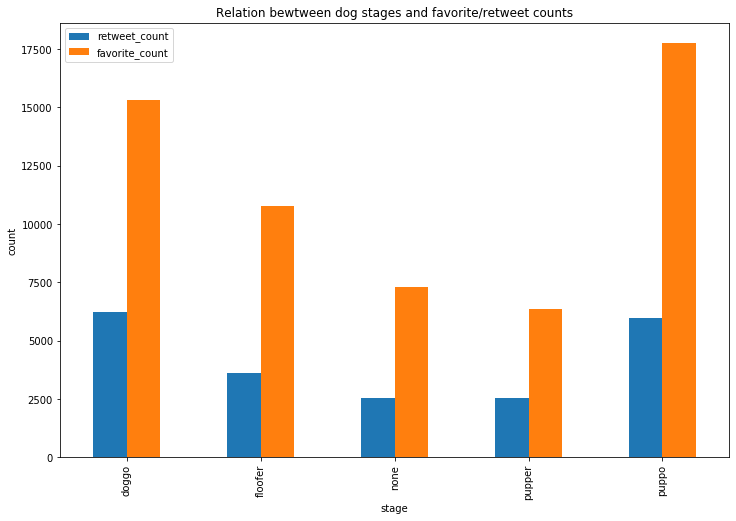

In [115]:
#Bar chart for retweet_count and favorite_count
df_q1[['retweet_count', 'favorite_count']].plot(kind='bar', legend=True, figsize=(12, 8))
plt.title('Relation bewtween dog stages and favorite/retweet counts')
plt.xlabel('stage')
plt.ylabel('count')
plt.show()

It appears from the above graph that puppos (equivalent to teenager age) were the most 'liked' on average, followed by doggos and then floofers and puppers. Same thing for retweets, except that doggos were more retweeted than puppos

***What are the breeds that are most 'liked'?***

First, I need to merge the df_clean table, containing all the information about the tweet_ids, and the image prediction table

In [73]:
#Create a new df for this question and merge the two df
df_q2 = pd.merge(df_clean, im_clean, on='tweet_id')
df_q2.shape

(2072, 23)

Then I will select only the rows where the prediction for a dog is True and the prediction confidence exceeds 40%. This will be based on the 'prediction' column.

In [74]:
df_q2.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'time', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'first_prediction',
       'first_confidence', 'is_a_dog_1', 'second_prediction',
       'second_confidence', 'is_a_dog_2', 'third_prediction',
       'third_confidence', 'is_a_dog_3'],
      dtype='object')

In [75]:
df_q2 = df_q2[(df_q2.is_a_dog_1 == True) & (df_q2.first_confidence >= 0.4)]
df_q2['is_a_dog_1'].value_counts()

True    1131
Name: is_a_dog_1, dtype: int64

In [76]:
df_q2.first_confidence.min(), df_q2.favorite_count.min()

(0.400568, 0)

In [77]:
df_q2_new = df_q2.groupby('first_prediction', as_index=False)['favorite_count'].sum()

In [78]:
df_q2_new = df_q2_new[df_q2_new.favorite_count != 0]
df_q2_new.sort_values(by='favorite_count', ascending=False, inplace=True)
df_q2_new

,first_prediction,favorite_count
139,golden_retriever,1504636
186,labrador_retriever,917191
249,pembroke,893757
77,chihuahua,456405
282,samoyed,427455
...,...,...
220,miniature_schnauzer,1185
232,norwich_terrier,757
325,sussex_spaniel,629
138,giant_schnauzer,212


After sorting our values, it seems that the golden_retriever is the winner for the most 'favorite'. Let's have a visual look at our results. I will plot a barh for the top 10 breeds in terms of 'favorite'

In [79]:
#Top ten dogs:
top = df_q2_new.iloc[0:10, :]
top.set_index('first_prediction', inplace=True)

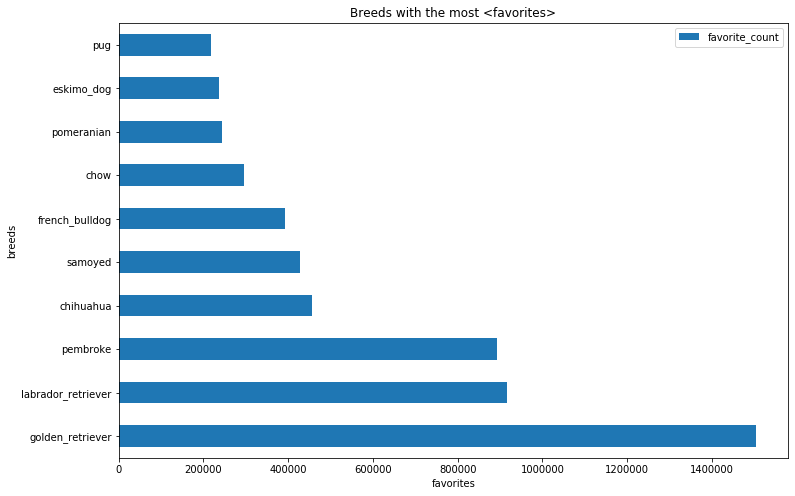

In [84]:
#Ploting a barh graph:
top.plot(kind='barh', figsize=(12, 8))
plt.title('Breeds with the most <favorites>')
plt.xlabel('favorites')
plt.ylabel('breeds')
plt.show()

At the top we have the golden_retriever with more than 1,5 million favorites, followed by the labrador_retriever (less than 1 million) and then the pembroke and the chihuahua.

***Is there any strong relation between the variables rating_numerator and retweet_count and the variable favorite_count?***

To answer this question, I will first scatter plot each variable with the favorite_count var. Then, I will calculate the correlation coefficient between them. Finally, I will run a regression model where the favorite_count will be the dependant variable.<br>
The purpose of this question is to know if the ratings of dogs or the retweeting of these ratings affect the number of 'favorites' or not.

First, I am going to make a scatter plot to visualize this relation. Before that I will create a third df for our question

In [107]:
#Create a new df for this question:
df_q3 = df_clean[['retweet_count', 'favorite_count', 'rating_numerator']]
df_q3.head(1)

,retweet_count,favorite_count,rating_numerator
0,6766,30168,14


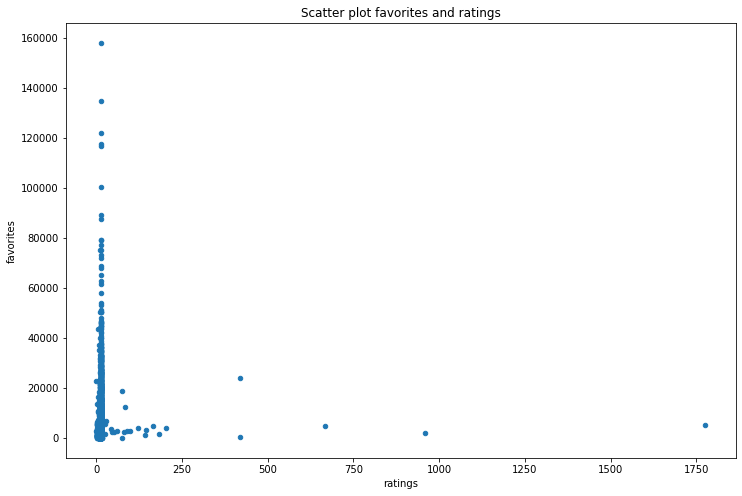

In [113]:
df_q3.plot(kind='scatter', x='rating_numerator', y='favorite_count', figsize=(12, 8))
plt.title('Scatter plot favorites and ratings')
plt.xlabel('ratings')
plt.ylabel('favorites')
plt.show()

The scatter plot is skewed left and doesn't give us an insight about this relation, except the fact that there are some outliers, and that the majority of the ratings are of two-digit number

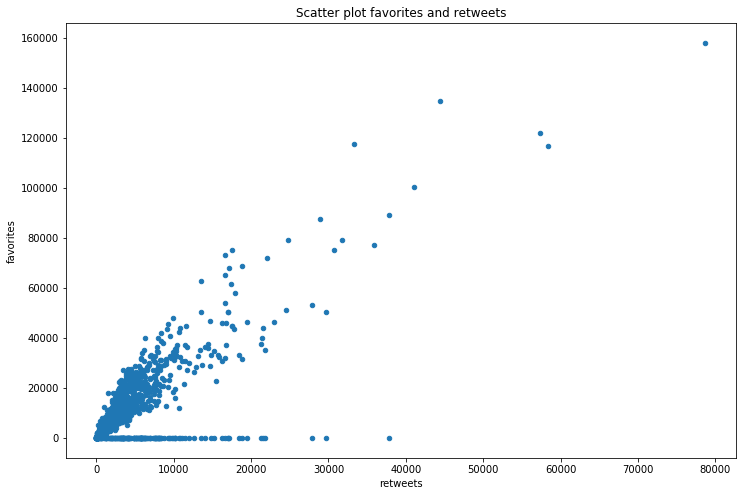

In [116]:
df_q3.plot(kind='scatter', x='retweet_count', y='favorite_count', figsize=(12, 8))
plt.title('Scatter plot favorites and retweets')
plt.xlabel('retweets')
plt.ylabel('favorites')
plt.show()

This scatter-plot shows some correlation between the two variables. As the retweets increase, we can see that number of favorites gets higher.

Now let's calculate the correlation between our variables of interest

In [110]:
df_q3.corr(method='pearson')

,retweet_count,favorite_count,rating_numerator
retweet_count,1.000000,0.801037,0.003819
favorite_count,0.801037,1.000000,0.005014
rating_numerator,0.003819,0.005014,1.000000


The correlation matrix shows that the favorite_count variable is highly correlated with the retweet_count variable. In fact, the more the tweet is retweeted the more likely it is to be viewed and "liked". On the other hand, the matrix shows a week correlation between the ratings and the favorites. This is in line with what we saw earlier in the scatter plot, but we need more evidence to draw any conclusion.

In [111]:
import statsmodels.api as sm

In [102]:
# Defining the intercept
df_q3['intercept'] = 1
# Model:
mod = sm.OLS(df_q3.favorite_count, df_q3[['retweet_count', 'rating_numerator', 'intercept']])
res = mod.fit()
print(res.summary())

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                            OLS Regression Results                            
Dep. Variable:         favorite_count   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2097.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:27:51   Log-Likelihood:                -24125.
No. Observations:                2345   AIC:                         4.826e+04
Df Residuals:                    2342   BIC:                         4.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
retweet_count        2.0509      0.032  

From the coefficient above, we confirm our previous correlation results. There is a significant (positive) relationship between retweets and favorites, with an R2 model of 0.64. On the other hand, there is no relation between ratings and favorites.
This analysis could be much more comprehensive if we include other qualitative variables into a logit model to explain the favorites, like the stage or the breeding for exapmle. But this would take more time and goes beyond the objectives of this project.